# Proyek Analisis Data: Bike Sharing
- **Nama:** Haifan Tri Buwono Joyo Pangestu
- **Email:** haifan.tribuwono@gmail.com
- **ID Dicoding:** haiffy

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana penggunaan bike sharing berubah sepanjang tahun 2011 dan 2012?
- Pertanyaan 2: Bagaimana penggunaan bike sharing dipengaruhi oleh faktor cuaca seperti temperatur, kelembaban, kecepatan angin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

Membaca dataset bike sharing


In [2]:
df = pd.read_csv('day.csv')

### Assessing Data

Lihat 5 baris pertama data

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Deskripsi singkat dari setiap fitur:


dteday, yr, mnth, hr - tanggal, tahun, bulan, jam

season - 1 = musim semi, 2 = musim panas, 3 = musim gugur, 4 = musim dingin

holiday - apakah hari libur atau tidak

workingday - apakah hari tersebut bukan hari weekend atau hari libur

weather -

1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut

3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan

4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

temp - temperatur yang telah dinormalisasi dalam Celsius

atemp - temperatur "perasaan" yang telah dinormalisasi dalam Celsius

humidity - kelembapan relatif

windspeed - kecepatan angin

casual - jumlah pengguna bike-sharing yang tidak terdaftar

registered - jumlah pengguna bike-sharing yang terdaftar

cnt - total penyewaan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Melihat rangkuman parameter statistik

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengecek missing value


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengahapus kolom yang tidak perlu

instant: index data

In [8]:
df = df.drop(['instant'], axis=1)

## Exploratory Data Analysis (EDA)

### Distribusi data

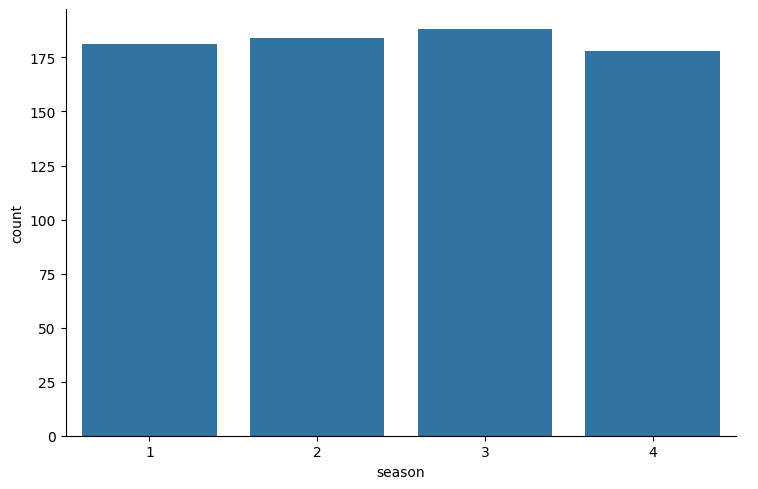

In [9]:
sns.catplot(x='season',data=df,kind='count',aspect=1.5)

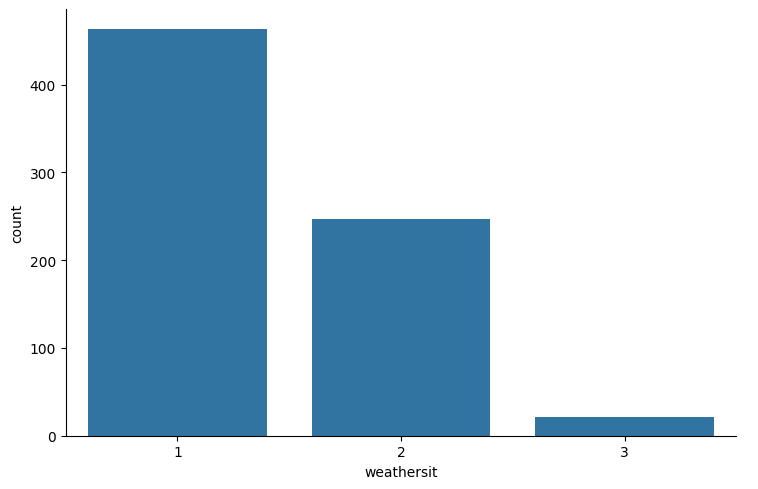

In [10]:
sns.catplot(x='weathersit',data=df,kind='count',aspect=1.5)

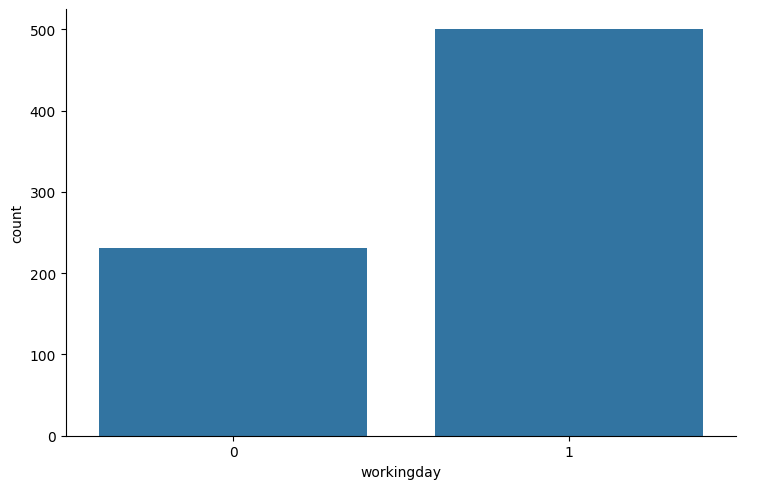

In [11]:
sns.catplot(x='workingday',data=df,kind='count',aspect=1.5)

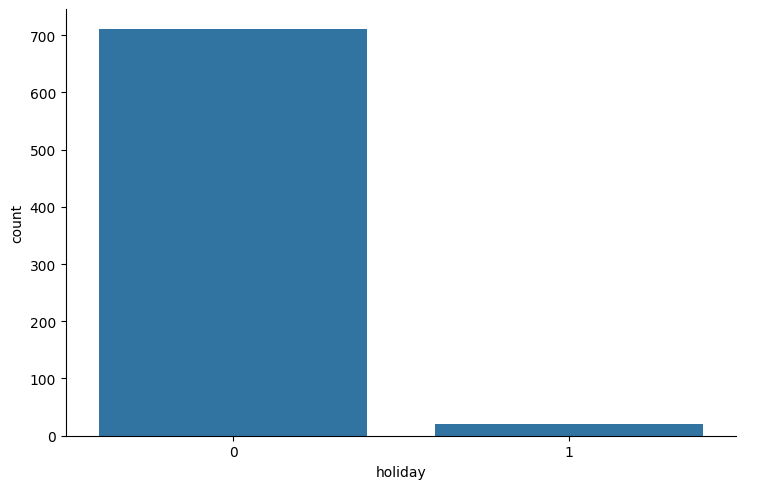

In [12]:
sns.catplot(x='holiday',data=df,kind='count',aspect=1.5)

### Heatmap

Heatmap korelasi antara temperatur, kelembaban, kecepatan angin dan penggunaan bike sharing untuk melihat apakah ada hubungan yang jelas antara variabel-variabel tersebut.

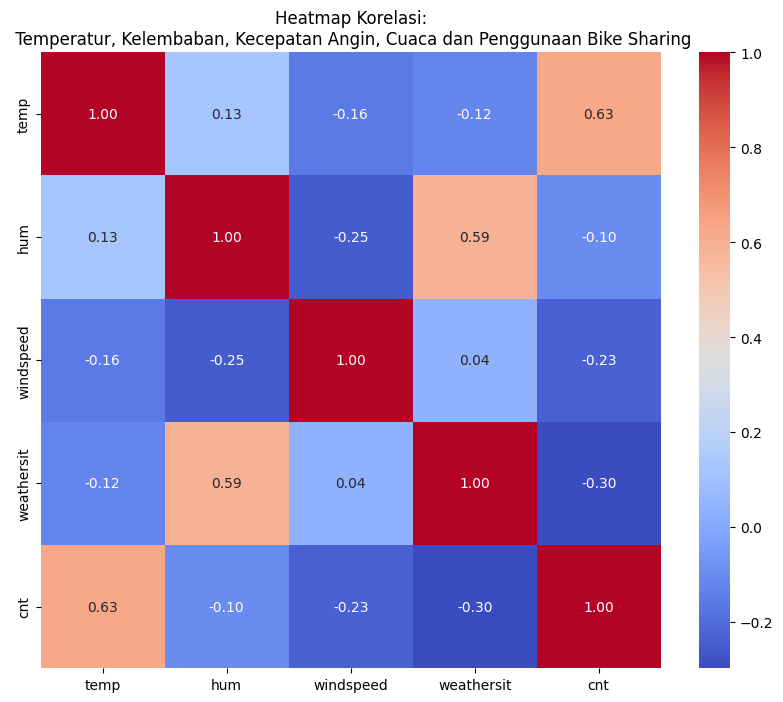

In [13]:
data_heatmap = df[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']]

correlation_matrix = data_heatmap.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi:\n Temperatur, Kelembaban, Kecepatan Angin, Cuaca dan Penggunaan Bike Sharing')
plt.show()

Temperatur dengan jumlah pengguna memiliki nilai korelasi 0.63 yang menunjukkan bahwa kedua variabel bergerak ke arah yang sama. Kondisi cuaca dengan jumlah pengguna memiliki nilai korelasi -0.30 yang menunjukkan bahwa kedua variabel tersebut bergerak ke arah yang berlawanan. Tampaknya faktor lain seperti kelembaban udara dan kecepatan angin tidak mempengaruhi jumlah pengguna secara langsung.

### Klastering menggunakan KMeans

#### Langkah 1: Menyiapkan data

Menggunakan hanya dua fitur untuk klastering sederhana


In [14]:
X = df[['temp', 'cnt']]

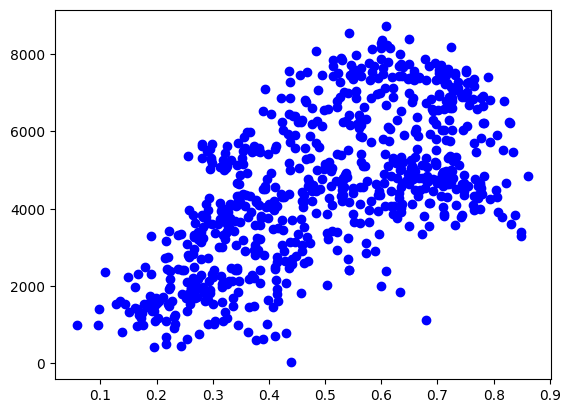

In [15]:
plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X.iloc[i, 0])
    ploty.append(X.iloc[i, 1])
plt.plot(plotx, ploty, 'bo')

#### Langkah 2: Mendefinisikan fungsi-fungsi untuk klastering

Fungsi untuk menghasilkan titik-titik pusat klaster secara acak

In [16]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

Fungsi untuk mengelompokkan titik data ke klaster terdekat

In [17]:
def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

Fungsi untuk menghitung pusat klaster baru

In [18]:
def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])


    return new_centers

Fungsi untuk melatih model klastering K-Means

In [19]:
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data[0])
    print('data[0]:',data[0])
    centers = random_centers(dims,k)

    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)

    return centers

Fungsi untuk memprediksi klaster titik data baru


In [20]:
def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])

    if dims != center_dims:
        raise ValueError('Point yang diberikan untuk prediksi memiliki' + dims + 'dimensi sedangkan centers mempunyai' + center_dims + 'dimensi')

    nearest_center = None
    nearest_dist = None

    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)

    return nearest_center

#### Langkah 3: Melakukan training model

In [21]:
X = [[temp, cnt] for temp, cnt in zip(plotx, ploty)]

centers = train_k_means_clustering(X, k=3, epochs=5)

data[0]: [0.344167, 985]
centers: [[40, 78], [74, 11], [96, 75]] dims: 2
[361.68628039999993, 3292657] 0
[361.68628039999993, 3292657] 1
[0.44, 22] 0
[0.44, 22] 1
centers: [[0.4954606580821917, 4510.489041095891], [0.44, 22.0], [96, 75]] dims: 2
[328.86629699999975, 3111090] 0
[328.86629699999975, 3111090] 1
[33.25998340000001, 181589] 0
[33.25998340000001, 181589] 1
centers: [[0.5373632303921565, 5083.480392156863], [0.2794956588235295, 1525.9579831932774], [96, 75]] dims: 2
[300.2845609999998, 2893580] 0
[300.2845609999998, 2893580] 1
[59.0994394, 394456] 0
[59.0994394, 394456] 1
[2.74228, 4643] 0
[2.74228, 4643] 1
centers: [[0.5623306385767787, 5418.689138576779], [0.31435872021276595, 2098.1702127659573], [0.3046977777777778, 515.8888888888889]] dims: 2
[279.59604699999994, 2717294] 0
[279.59604699999994, 2717294] 1
[73.06157830000001, 543664] 0
[73.06157830000001, 543664] 1
[9.4686551, 31721] 0
[9.4686551, 31721] 1
centers: [[0.5776777830578511, 5614.243801652892], [0.344630086320

#### Langkah 4: Melakukan prediksi dan visualisasi klastering

In [22]:
X_pred = df[['temp', 'cnt']]
df['Cluster'] = [predict_k_means_clustering(point, centers) for point in X_pred.values]

center: 0 dist: 4806.513698630137
center: 1 dist: 2042.9227272727271
center: 2 dist: 245.86301369863008
center: 0 dist: 4990.513698630137
center: 1 dist: 2226.922727272727
center: 2 dist: 429.8630136986301
center: 0 dist: 4442.513698630137
center: 1 dist: 1678.9227272727271
center: 2 dist: 118.13698630136992
center: 0 dist: 4229.513698630137
center: 1 dist: 1465.9227272727271
center: 2 dist: 331.1369863013699
center: 0 dist: 4191.513698630137
center: 1 dist: 1427.9227272727271
center: 2 dist: 369.1369863013699
center: 0 dist: 4185.513698630137
center: 1 dist: 1421.9227272727271
center: 2 dist: 375.1369863013699
center: 0 dist: 4281.513698630137
center: 1 dist: 1517.9227272727271
center: 2 dist: 279.1369863013699
center: 0 dist: 4832.513698630137
center: 1 dist: 2068.922727272727
center: 2 dist: 271.8630136986301
center: 0 dist: 4969.513698630137
center: 1 dist: 2205.922727272727
center: 2 dist: 408.8630136986301
center: 0 dist: 4470.513698630137
center: 1 dist: 1706.9227272727271
cente

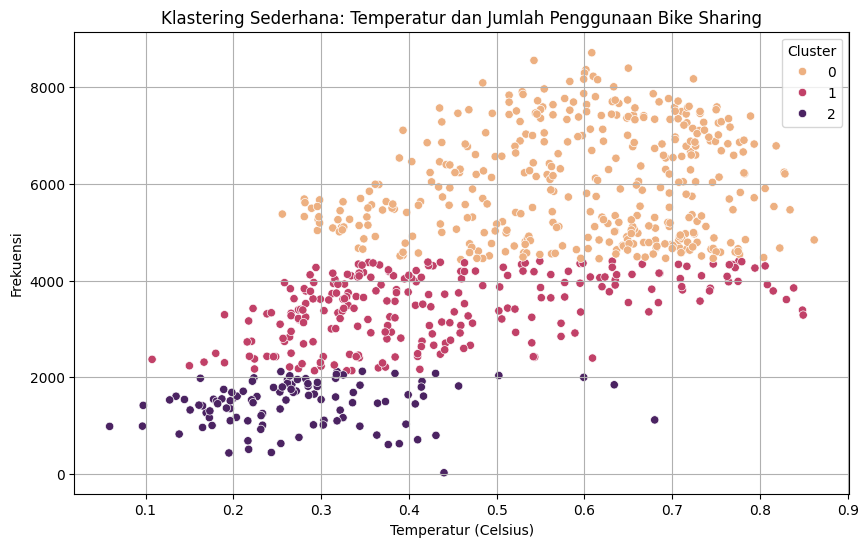

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt', hue='Cluster', palette='flare')
plt.title('Klastering Sederhana: Temperatur dan Jumlah Penggunaan Bike Sharing')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Visualisasi grafik tren penggunaan bike sharing per hari selama tahun 2011 dan 2012


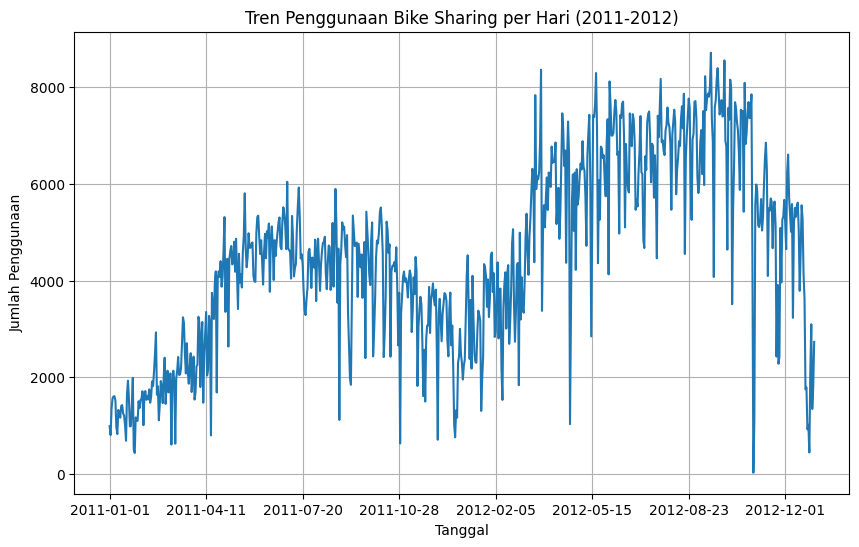

In [24]:
daily_data = df.groupby('dteday').sum()['cnt']
plt.figure(figsize=(10, 6))
daily_data.plot()
plt.title('Tren Penggunaan Bike Sharing per Hari (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan')
plt.grid(True)
plt.show()

### Pertanyaan 2:

Visualisasi penggunaan bike sharing berdasarkan faktor cuaca seperti temperatur, kelembapan, dan kecepatan angin.

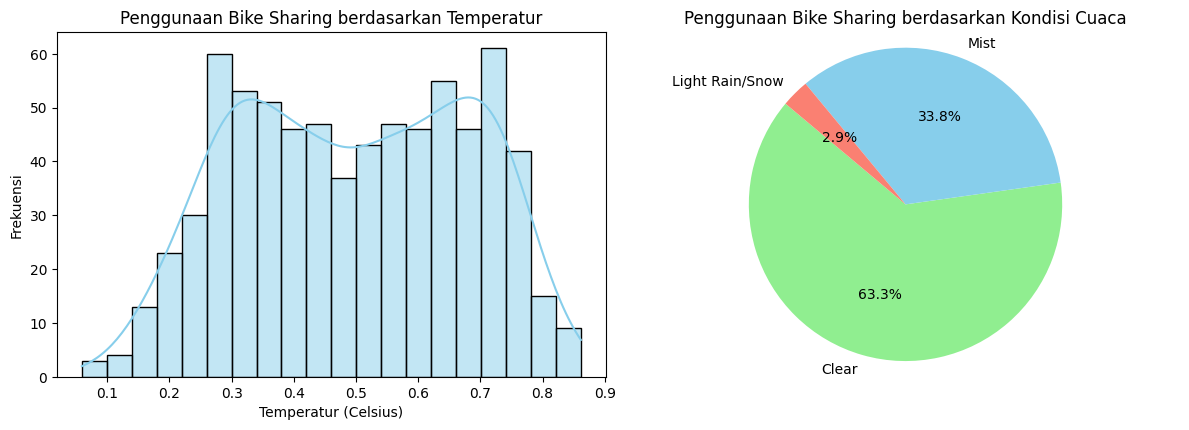

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='temp', bins=20, kde=True, color='skyblue')
plt.title('Penggunaan Bike Sharing berdasarkan Temperatur')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Frekuensi')

weather_counts = df['weathersit'].value_counts()
plt.subplot(2, 2, 2)
plt.pie(weather_counts, labels=['Clear', 'Mist', 'Light Rain/Snow'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'skyblue', 'salmon', 'gray'])
plt.title('Penggunaan Bike Sharing berdasarkan Kondisi Cuaca')
plt.axis('equal')

plt.tight_layout()
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Terdapat tren peningkatan penggunaan bike sharing dari tahun 2011 ke tahun 2012.
- Conclusion pertanyaan 2: Penggunaan bike sharing cenderung dipengaruhi oleh temperatur dan kondisi cuaca. Jumlah penggunaan meningkat pada saat temperatur sedang dan/atau saat cuaca cerah. Faktor lain seperti kelembaban udara dan kecepatan angin tidak memiliki pengaruh yang signifikan secara langsung terhadap penggunaan bike sharing.